# MiniProjeto 1 - Identificação de distribuições

## Objetivo

O objetivo deste projeto é identificar quais distribuições (pdf - funções de densidade de probabilidade - no caso contínuo, ou pmf - funções de probabilidade - no caso discreto) descrevem bem as variáveis quantitativas extraídas de *datasets*.

O resultado final esperado é um relatório que identifique, com bons argumentos, modelos probabilísticos para uma variável quantitativa e uma variável qualitativa de um ou mais *datasets*.

Este projeto é **estritamente individual**.


## O que deve ser feito

Você precisa escolher duas variáveis, uma quantitativa e uma qualitativa, em *datasets* públicos de sua escolha. As duas variáveis podem vir do mesmo *dataset*.

Limpe e prepare os dados para processamento (tratando valores `NaN`, `N/A`, por exemplo). Fique atento ao dicionário de dados (se houver) para identificar quais colunas de fato são quantitativas e eventualmente remover valores inválidos.

A seguir, estude as variáveis escolhidas e procure identificar DUAS possíveis funções que podem descrever sua probabilidade de ocorrência.

Sugerimos que o trabalho siga as seguintes fases:

1. Seleção de um *dataset* e escolha de variáveis quantitativas adequadas.
2. Limpeza do *dataset*, se necessário.
3. Inspeção visual da distribuição das variáveis escolhidas - usando um histograma, por exemplo.
4. Formulação de hipóteses sobre a forma da distribuição dos dados.
5. Tentativa de estimar os parâmetros da família de distribuições escolhida no item acima a partir dos dados. Obs: As distribuições do pacote `scipy.stats` têm uma função chamada `fit()` que procura estimar os parâmetros a partir do conjunto de dados. Cada distribuição possui parâmetros estimados diferentes.
6. Análise do histrograma vs. o plot teórico de cada distribuição escolhida.
7. Análise da frequência relativa acumulada vs. a função de probabilidade acumulada (cdf) de cada.
8. Análise do Q-Q-Plot (quantil amostral vs. quantil teórico).
9. Teste de aderência para a distribuição. Como você irá comparar o resultado dos dois ajustes?
10. Escreva uma conclusão sobre os resultados obtidos.

Não há restrições em relação à base de dados a utilizar, **desde que não seja a mesma base da PNAD já usada na disciplina**. Aconselha-se evitar variáveis de bases com pequeno tamanho amostral.

Tornamos disponível uma [Lista de datasets](https://docs.google.com/document/d/1zzc__WZp-gVrpK6zHqfDZr0vyqz2FwyTKIM2TtoEZ-g/pub "Datasets interessantes") que pode ajudar nesta fase do trabalho. Você não precisa ficar restrito a esta lista.

## Entregáveis esperados e datas

Item | Data | Descrição
---|---|---
Indicação de dataset | 14/09/2016 | Indicar datasets e variáveis de interesse.
Relatório final| 21/09/2016| Notebook completo com os itens descritos acima.


In [77]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import numpy as np
from scipy.stats import *
from math import sqrt, trunc
from scipy import linspace
os.chdir ("C:\\Users\\Avell\\Desktop\\Insper\\3˚ Semestre\\Ciencia_dos_Dados_DP\\Mini Projeto 1")

In [78]:
ex_orc = pd.read_excel('despesas são caetano.xlsx')
dados = ex_orc.loc[:, ("vl_despesa")]
despesa = pd.Series(data=sorted(dados))
despesa = despesa[despesa > 0]
despesa = despesa[despesa < 12000]

O histograma apresenta assimetria a direita.


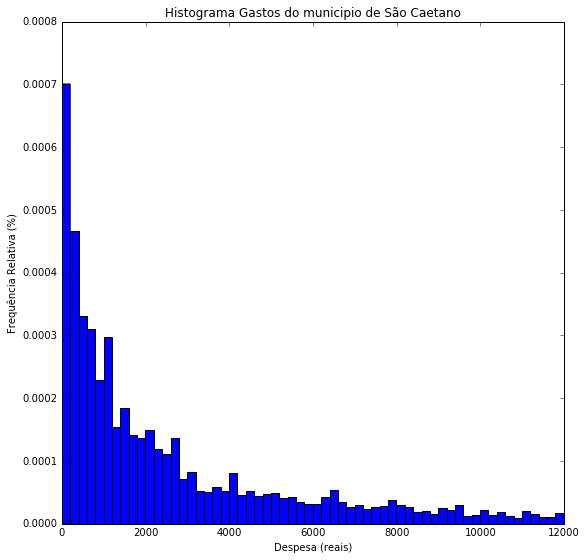

In [79]:
plot = despesa.plot.hist(bins = 60, normed = True, title= 'Histograma Gastos do municipio de São Caetano', figsize=(9,9))
plt.ylabel("Frequência Relativa (%)")
plt.xlabel("Despesa (reais)")
print("O histograma apresenta assimetria a direita.")

A forma da distribuição de dados se assemelha com as Exponenciais e a de Weibull

In [80]:
print("Os parâmentros utilizados na distribuição exponencial são:", despesa.min(), "e", despesa.std())

Os parâmentros utilizados na distribuição exponencial são: 0.01 e 2820.290401173809


In [81]:
print("Os parâmentros utilizados na distribuição de Weibull são:", despesa.mean(), ",", despesa.std(), "e", "1")

Os parâmentros utilizados na distribuição de Weibull são: 2530.923498499216 , 2820.290401173809 e 1


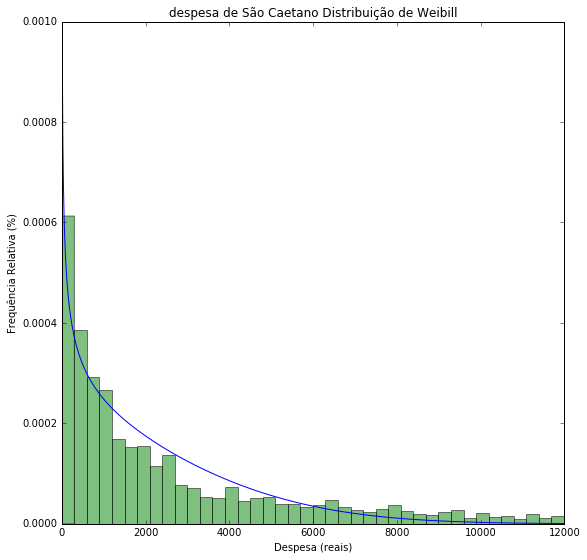

In [82]:
plt.plot(despesa, exponweib.pdf(despesa, *exponweib.fit(despesa, 1, 1, loc=despesa.mean(), scale=despesa.std())))
plot = despesa.plot.hist(bins = 40, normed = True, alpha = 0.5, figsize = (9,9), title= 'despesa de São Caetano Distribuição de Weibill')
plt.ylabel("Frequência Relativa (%)")
plt.xlabel("Despesa (reais)")
plt.axis([despesa.min(), despesa.max(), 0, 0.001])
plt.show()

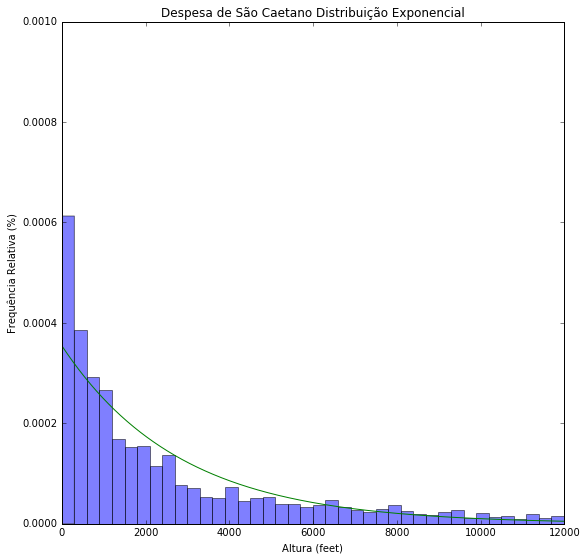

In [83]:
x = np.linspace(despesa.min(), despesa.max(), 1000)
exponencial = expon.pdf(x, loc = despesa.min(), scale=despesa.std())
plt.plot(x, exponencial, '-', color='green')
plot = despesa.plot.hist(bins = 40, normed = True, alpha = 0.5, figsize = (9,9), title= 'Despesa de São Caetano Distribuição Exponencial')
plt.ylabel("Frequência Relativa (%)")
plt.xlabel("Altura (feet)")
plt.axis([despesa.min(), despesa.max(), 0, 0.001])
plt.show()

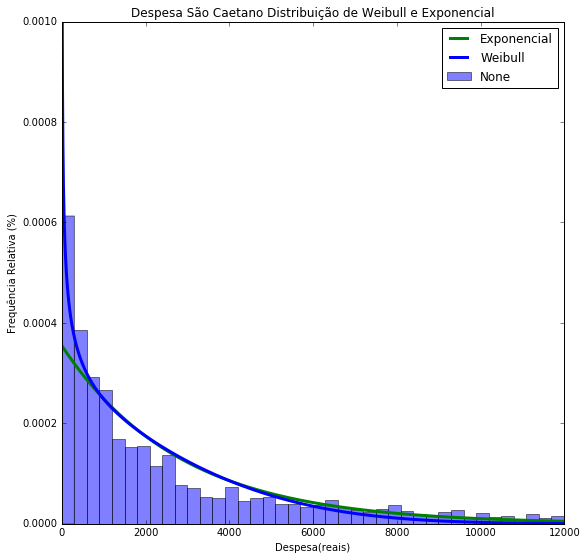

In [84]:
x = np.linspace(despesa.min(), despesa.max(), 1000)
exponencial = expon.pdf(x, loc = despesa.min(), scale=despesa.std())
plt.plot(x, exponencial, '-', color='green', label="Exponencial", lw=3) # Plota a exponencial teórica

plt.plot(despesa, exponweib.pdf(despesa, *exponweib.fit(despesa, 1, 1, loc=despesa.mean(), scale=despesa.std())),color='blue', label="Weibull", lw=3)

plot = despesa.plot.hist(bins = 40, normed = True, alpha = 0.5, figsize = (9,9), title= 'Despesa São Caetano Distribuição de Weibull e Exponencial')
plt.ylabel("Frequência Relativa (%)")
plt.xlabel("Despesa(reais)")
plt.axis([despesa.min(), despesa.max(), 0, 0.001])
plt.legend()
plt.show()

Podemos observar no histograma acima que as funções Exponenciais e principalmente a de Weibull, se assemelham a distribuição dos dados amostrais.

KeyError: 0

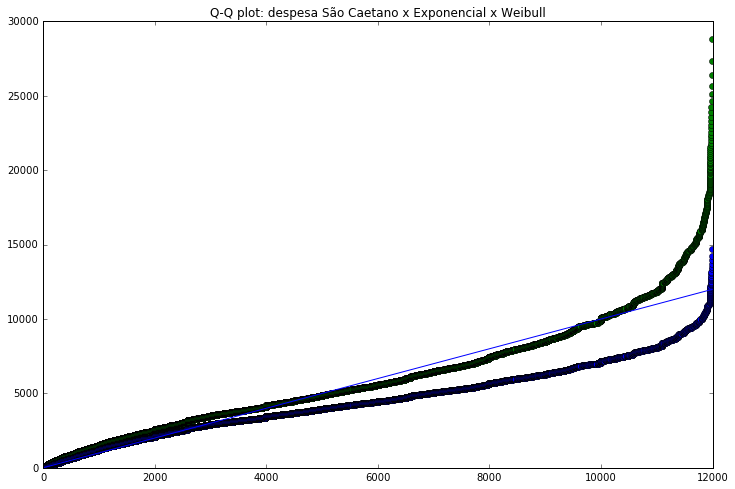

In [85]:
# dados ordenados e quantis teóricos - QQplot

# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
relativa = [] # frequencia relativa acumulada
for i in range(len(despesa)):
    acc = (i - 0.5) / len(despesa)
    if acc < 0:
        acc = 0
    relativa.append(acc) # ver Magalhães e Lima (pag. 195)

# Convertemos fra em uma Series do Pandas
relativa = pd.Series(data=relativa)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_exp = expon.ppf(relativa, loc = despesa.min(), scale=despesa.std()) # quantis teóricos da exponencial
q_weibill = exponweib.ppf(relativa, *exponweib.fit(despesa, 1, 1, loc=despesa.mean(), scale=despesa.std()))


fig = plt.figure(figsize=(12,8))
plt.title("Q-Q plot: despesa São Caetano x Exponencial x Weibull")

exp_plot = plt.plot(despesa, q_exp, 'o', color="g", label="Exponencial")
weibill_plot = plt.plot(despesa, q_weibill, 'o', color="b", label = "Weibull")

#plt.legend(handles=[exp_plot, weibill_plot])
plt.plot((min(despesa), max(despesa)), (min(despesa), max(despesa)), '-')

for i in range(len(despesa)):
    plt.plot((despesa[i], despesa[i]), (q_exp[i], despesa[i]), '-', color='red', alpha=0.3  )
    plt.plot((despesa[i], despesa[i]), (q_weibull[i], despesa[i]), '-', color='green', alpha=0.3  )



Podemos observar que no começo ambas as funções se acomodam bem na bissetriz, porém conforme avançamos na bissetriz, vemos ambas as funções se afastando da mesma, e no final apresentam um comportamento que dificulta a sua analise. Este comportamento deve ser devido a valores extremos na base de dados que prejudicam o formato da daistribuição, impedindo uma analise adequada.

[]

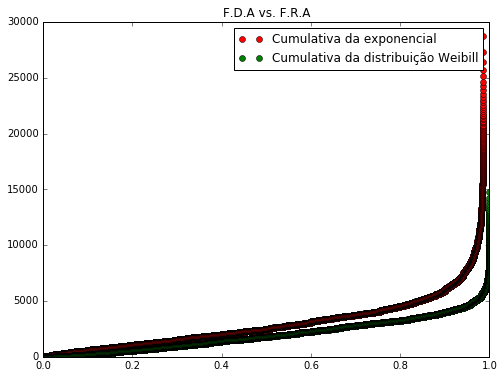

In [95]:
# Gera os valores dos quantis teóricos para as distribuições analisadas
cdf_exp = expon.cdf(despesa, loc = despesa.min(), scale=despesa.std())
cdf_weibill = exponweib.cdf(despesa, *exponweib.fit(despesa, 1, 1, loc=despesa.mean(), scale=despesa.std()))

fig = plt.figure(figsize=(8,6))

plt.title("F.D.A vs. F.R.A")

cdf_exp_plot,   = plt.plot(cdf_exp, q_exp, 'o', color='red', label = "Cumulativa da exponencial")
cdf_weibill_plot, = plt.plot(cdf_weibill, q_weibill, 'o', color='green', label = "Cumulativa da distribuição Weibill")

plt.legend(handles=[cdf_exp_plot, cdf_weibill_plot])
plt.plot()

KeyError: 0

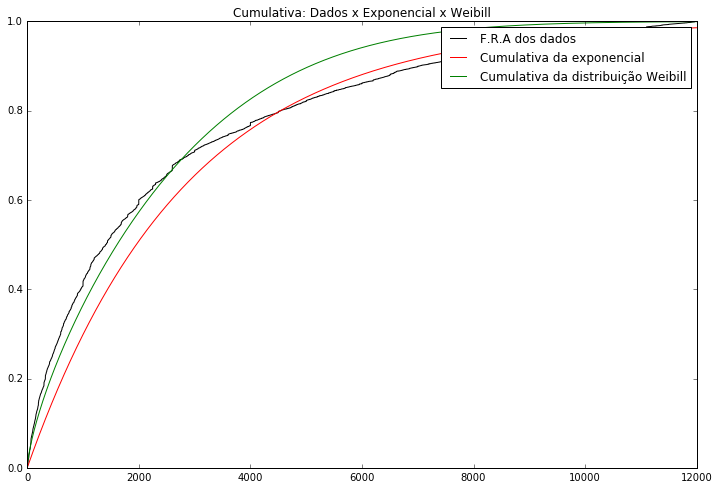

In [104]:
cdf_exp = expon.cdf(despesa, loc = despesa.min(), scale=despesa.std())
cdf_weibill = exponweib.cdf(despesa, *exponweib.fit(despesa, 1, 1, loc=despesa.mean(), scale=despesa.std()))

fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Exponencial x Weibill")

despesa_relativa_plot, = plt.plot(despesa, relativa, '-', color='black', label="relativa dos dados")
cdf_exp_plot,   = plt.plot(despesa, cdf_exp, '-', color='red', label = "Cumulativa da exponencial")
cdf_weibill_plot, = plt.plot(despesa, cdf_weibill, '-', color='green', label = "Cumulativa da distribuição Weibill")

plt.legend(handles=[despesa_fra_plot, cdf_exp_plot, cdf_weibill_plot])


for i in range(len(despesa)):
    plt.plot((despesa[i], despesa[i]), (fra[i], cdf_exp[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    plt.plot((despesa[i], despesa[i]), (fra[i], cdf_weibill[i]), '--', color="green", alpha=0.3)


Como podemos observar pelo formato da curva da frequencia relativa acumulada, seu formato foi influenciado por valores extremos no dataset. Desta forma não podemos dizer que nenhuma das duas funções se assemelha dos dados.

In [96]:
# Variavel discreta

discreta = np.trunc((despesa/1000))
discreta.shape[0]

40646

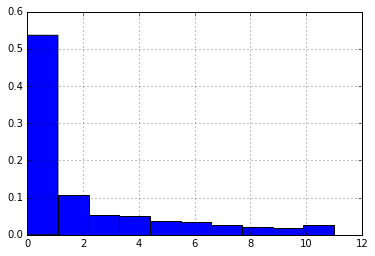

In [97]:
discreta.hist(normed=True)

A distribuição dos dados se assemelha as distribuições Logaritimica e de Planck.

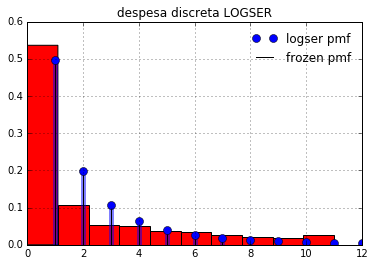

In [98]:
fig, ax = plt.subplots(1, 1)


p = 0.8
mean, var, skew, kurt = logser.stats(p, moments='mvsk')

x = np.arange(logser.ppf(0.01, p),
              logser.ppf(0.99, p))
ax.plot(x, logser.pmf(x, p), 'bo', ms=8, label='logser pmf')
ax.vlines(x, 0, logser.pmf(x, p), colors='b', lw=5, alpha=0.5)

rv = logser(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
         label='frozen pmf')
ax.legend(loc='best', frameon=False)
discreta.hist(normed=True, color="r")
plt.title("despesa discreta LOGSER")
plt.show()



Podemos observar que a distribuição dos dados se encaixa bem com a função logarítimica.

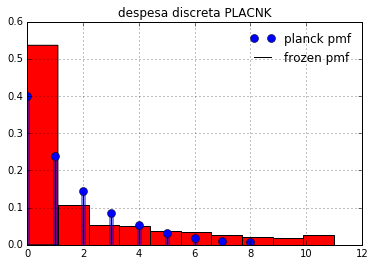

In [99]:
fig, ax = plt.subplots(1, 1)

lambda_ = 0.51
mean, var, skew, kurt = planck.stats(lambda_, moments='mvsk')

x = np.arange(planck.ppf(0.01, lambda_),
               planck.ppf(0.99, lambda_))
ax.plot(x, planck.pmf(x, lambda_), 'bo', ms=8, label='planck pmf')
ax.vlines(x, 0, planck.pmf(x, lambda_), colors='b', lw=5, alpha=0.5)

rv = planck(lambda_)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
         label='frozen pmf')
ax.legend(loc='best', frameon=False)
discreta.hist(normed=True, color="r")
plt.title("despesa discreta PLACNK")
plt.show()



Podemos observar que a distribuição dos dados se encaixa de maneira razoável com a função de Planck

KeyError: 0

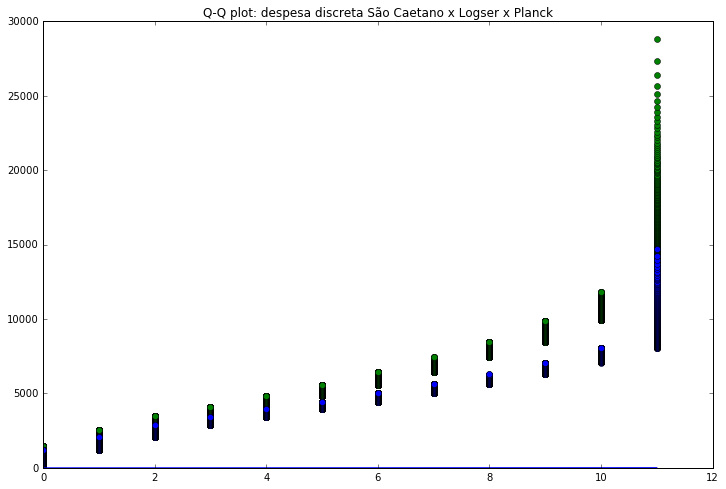

In [100]:
# dados ordenados e quantis teóricos - QQplot

# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
relativa = [] # frequencia relativa acumulada
for i in range(len(discreta)):
    acc = (i - 0.5) / len(discreta)
    if acc < 0:
        acc = 0
    relativa.append(acc) # ver Magalhães e Lima (pag. 195)

# Convertemos fra em uma Series do Pandas
relativa = pd.Series(data=relativa)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_log = logser.ppf(relativa, p, loc = discreta.min()) # quantis teóricos da exponencial
q_planck = planck.ppf(relativa, lambda_, loc=discreta.mean())


fig = plt.figure(figsize=(12,8))
plt.title("Q-Q plot: despesa discreta São Caetano x Logser x Planck")

log_plot = plt.plot(discreta, q_exp, 'o', color="g", label="Logser")
planck_plot = plt.plot(discreta, q_weibill, 'o', color="b", label = "Planck")

plt.plot((min(discreta), max(discreta)), (min(discreta), max(discreta)), '-')

for i in range(len(discreta)):
    plt.plot((discreta[i], discreta[i]), (q_log[i], discreta[i]), '-', color='red', alpha=0.3  )
    plt.plot((discreta[i], discreta[i]), (q_planck[i], discreta[i]), '-', color='green', alpha=0.3  )



KeyError: 0

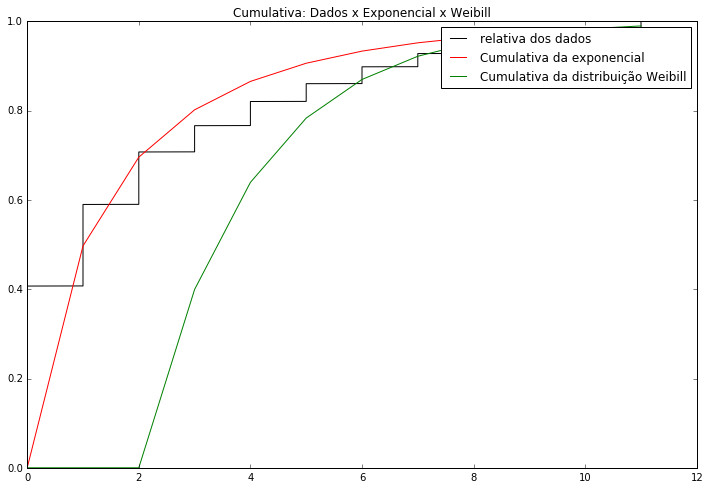

In [110]:
cdf_log = logser.cdf(discreta, p, loc = discreta.min())
cdf_planck = planck.cdf(discreta, lambda_, loc=discreta.mean())

fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Exponencial x Weibill")

discreta_relativa_plot, = plt.plot(discreta, relativa, '-', color='black', label="relativa dos dados")
cdf_log_plot,   = plt.plot(discreta, cdf_log, '-', color='red', label = "Cumulativa da exponencial")
cdf_planck_plot, = plt.plot(discreta, cdf_planck, '-', color='green', label = "Cumulativa da distribuição Weibill")

plt.legend(handles=[discreta_relativa_plot, cdf_log_plot, cdf_planck_plot])


for i in range(len(discreta)):
    plt.plot((discreta[i], discreta[i]), (relativa[i], cdf_log[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    plt.plot((discreta[i], discreta[i]), (relativa[i], cdf_planck[i]), '--', color="green", alpha=0.3)


Podemos observar 

CONCLUSÃO: Conseguimos observar nossa variavel contínua, Despesa do munícipio de São Caetano, que sua distribuição de dados se assemelha levemente com as funções exponenciais e de Weibull, porém a amostra apresenta uma série de dados extremos que prejudica nossa analise e nos impede de chegar a conclusões mais profundas.
De forma similar ao observamos nossa variavel discreta, Despesas do munícipio de São Caetano (transformado em discreto), percebemos que sua distribuição se assemelha (no caso do histograma de maneira mais acentuada) a das funções Logrítimica e de Planck. Mas da mesma forma que na varíavel contínua, valores extremos prejudicam nossa análise.